**Import The Necassary Libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import warnings
# Ignore warnings
warnings.filterwarnings("ignore")

**Data Loading and Checking Info**

In [ ]:
# Load the dataset skipping the second and third rows
data = pd.read_excel('/content/Copy of modified_excel_file 2 (1).xlsx', skiprows=[1, 2])

In [ ]:
data.head()

GrainsCount    Village      Block Longitude  SowingDate GradeNPK  \
0         71.0     Rajapur    Chausa    83.866  2016.10.01      NaN   
1         68.2     Rajapur    Chausa    83.866  2016.10.01      NaN   
2         59.0    Paharpur  Paharpur     84.59  2016.11.10      NaN   
3         65.8    Barharwa     Kotwa    84.805  2016.11.10      NaN   
4         60.2  Chapkahiya    Areraj    84.603  2016.11.10      NaN   

  HerbicideDate HarvestDate        Year        District  ... TestWeight  \
0    2016.11.28  2017.04.21  2016-01-17           Buxar  ...      41.05   
1    2016.11.28  2017.04.24  2016-01-17           Buxar  ...      41.71   
2    2016.12.12  2017.04.15  2016-01-17  East Champaran  ...      38.60   
3    2016.12.12  2017.04.18  2016-01-17  East Champaran  ...      38.57   
4    2016.12.12  2017.04.15  2016-01-17  East Champaran  ...      38.63   

   TillersSpot1 TillersSpot2 TillersSpot3 TillersCount  GrainsEH1 GrainsEH2  \
0         565.0        620.0        500.0        561.7         72        69   
1         600.0        525.0        525.0        550.0         65        65   
2         480.0        557.0        427.0        488.0         62        53   
3         485.0        530.0        405.0        473.3         69        62   
4         412.0        415.0        425.0        417.3         70        67   

  GrainsEH3 GrainsEH4  GrainsEH5  
0        71        72       71.0  
1        70        71       70.0  
2        64        66       50.0  
3        67        61       70.0  
4        65        54       45.0  

[5 rows x 56 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GrainsCount          3735 non-null   float64
 1   Village              3735 non-null   object 
 2   Block                3735 non-null   object 
 3   Longitude            3652 non-null   object 
 4   SowingDate           3735 non-null   object 
 5   GradeNPK             819 non-null    object 
 6   HerbicideDate        3512 non-null   object 
 7   HarvestDate          3735 non-null   object 
 8   Year                 3735 non-null   object 
 9   District             3735 non-null   object 
 10  State                3735 non-null   object 
 11  Latitude             3735 non-null   float64
 12  LandType             3735 non-null   object 
 13  SoilType             3735 non-null   object 
 14  PreviousCrop         3735 non-null   object 
 15  PrevCropResidue      3735 non-null   f

In [ ]:
# Convert columns to appropriate data types
data['GrainsCount'] = data['GrainsCount'].astype(int)
# Remove non-breaking spaces from 'Longitude' column and convert to float
data['Longitude'] = data['Longitude'].str.replace('\xa0', '').astype(float)
data['SowingDate'] = pd.to_datetime(data['SowingDate'])
data['HerbicideDate'] = pd.to_datetime(data['HerbicideDate'])
data['HarvestDate'] = pd.to_datetime(data['HarvestDate'])
data['WeedingNumber'] = data['WeedingNumber'].astype(int)
data['BasalDAP'] = data['BasalDAP'].astype(float)
data['Latitude'] = data['Latitude'].astype(float)
data['GrainSpot3'] = data['GrainSpot3'].astype(float)
data['BasalZn'] = data['BasalZn'].astype(float)
data['Split3Urea'] = data['Split3Urea'].astype(float)
data['BasalNPK'] = data['BasalNPK'].astype(float)
data['BundleSpot1'] = data['BundleSpot1'].astype(float)
data['TestWeight'] = data['TestWeight'].astype(float)
data['BiomassYield'] = data['BiomassYield'].astype(float)
data['GrainSpot1'] = data['GrainSpot1'].astype(float)
data['BundleSpot3'] = data['BundleSpot3'].astype(float)
data['BundleSpot2'] = data['BundleSpot2'].astype(float)
data['TillersCount'] = data['TillersCount'].astype(int)
data['TillersSpot1'] = data['TillersSpot1'].astype(float)
data['GrainSpot2'] = data['GrainSpot2'].astype(float)
data['GrainYield'] = data['GrainYield'].astype(float)
data['TillersSpot2'] = data['TillersSpot2'].astype(float)
data['TestWeightSpot3'] = data['TestWeightSpot3'].astype(float)
data['TillersSpot3'] = data['TillersSpot3'].astype(float)
data['Split2Urea'] = data['Split2Urea'].astype(float)
data['TestWeightSpot2'] = data['TestWeightSpot2'].astype(float)


In [ ]:
data.describe()

GrainsCount    Longitude                     SowingDate  \
count  3735.000000  3652.000000                           3735   
mean     52.767604    84.927884  2019-01-16 06:33:38.313252864   
min      27.000000    82.207000            2016-10-01 00:00:00   
25%      47.000000    84.054000            2017-12-12 00:00:00   
50%      54.000000    84.591000            2018-12-04 00:00:00   
75%      60.000000    86.015000            2019-12-10 00:00:00   
max      80.000000    87.527000            2020-12-31 00:00:00   
std       9.026538     1.077270                            NaN   

                       HerbicideDate                    HarvestDate  \
count                           3512                           3735   
mean   2019-02-23 15:48:47.562642176  2019-05-31 16:43:57.108433920   
min              2016-11-26 00:00:00            2017-03-30 00:00:00   
25%              2018-01-08 00:00:00            2018-04-15 00:00:00   
50%              2019-01-04 00:00:00            2019-04-18 00:00:00   
75%              2020-01-12 00:00:00            2020-04-15 00:00:00   
max              2021-01-31 00:00:00            2021-04-28 00:00:00   
std                              NaN                            NaN   

          Latitude  PrevCropResidue     SeedRate     BasalDAP     BasalNPK  \
count  3735.000000      3735.000000  3735.000000  3735.000000  3735.000000   
mean     25.901776        27.954654    45.616064   121.239826    65.008072   
min      24.878000        10.000000    40.000000    45.000000    15.000000   
25%      25.314000        10.000000    45.000000   125.000000    60.000001   
50%      25.923000        20.000000    45.000000   125.000000    69.585505   
75%      26.477000        50.000000    50.000000   125.000000    75.000000   
max      26.985000       100.000000    50.000000   130.000000    75.000062   
std       0.595459        18.117733     3.886769    12.353370    13.052778   

       ...   TestWeight  TillersSpot1  TillersSpot2  TillersSpot3  \
count  ...  3735.000000   3735.000000   3735.000000   3735.000000   
mean   ...    38.455679    361.139157    360.487015    358.650867   
min    ...    32.800000    172.000000    146.000000    150.000000   
25%    ...    36.920000    300.000000    298.000000    302.000000   
50%    ...    38.450000    340.000000    343.000000    340.000000   
75%    ...    40.000000    422.000000    422.000000    420.000000   
max    ...    46.230000    690.000000    650.000000    621.000000   
std    ...     2.107933     86.621701     88.436586     83.159394   

       TillersCount    GrainsEH1    GrainsEH2    GrainsEH3    GrainsEH4  \
count   3735.000000  3735.000000  3735.000000  3735.000000  3735.000000   
mean     359.774565    53.751272    52.263454    53.415797    53.238019   
min      163.000000    21.000000    20.000000    21.000000    20.000000   
25%      300.000000    46.000000    44.000000    45.000000    46.000000   
50%      342.000000    55.000000    54.000000    54.000000    54.000000   
75%      421.000000    62.000000    60.000000    62.000000    61.000000   
max      621.000000    92.000000   102.000000    91.000000    90.000000   
std       82.386619    11.282276    11.187126    11.236052    10.952292   

         GrainsEH5  
count  3735.000000  
mean     53.168193  
min      21.000000  
25%      46.000000  
50%      54.000000  
75%      61.000000  
max      94.000000  
std      10.879431  

[8 rows x 41 columns]

In [ ]:
data.isnull().sum()

GrainsCount               0
Village                   0
Block                     0
Longitude                83
SowingDate                0
GradeNPK               2916
HerbicideDate           223
HarvestDate               0
Year                      0
District                  0
State                     0
Latitude                  0
LandType                  0
SoilType                  0
PreviousCrop              0
PrevCropResidue           0
CropEstablishment         0
Variety                   0
VarietyClass              0
SeedRate                  0
SowingSchedule            0
BasalDAP                  0
BasalNPK                  0
BasalMOP                  0
BasalZn                   0
Split1Urea                0
Split2Urea                0
Split3Urea                0
IrrigationNumber          0
FirstIrrigationDay        0
SecondIrrigationDay       0
ThirdIrrigationDay        0
HerbicideName             0
HerbicideDose             0
WeedingNumber             0
BundleSpot1         

In [ ]:
columns_to_drop = ['GradeNPK', 'Block','State','District','SowingSchedule','Village ']

data.drop(columns=columns_to_drop, inplace=True)

# Step 2: Fill missing values in 'Longitude' with mode
longitude_mode = data['Longitude'].mode()[0]
data['Longitude'].fillna(longitude_mode, inplace=True)

# Step 3: Convert date columns to datetime type
date_columns = ['HerbicideDate', 'SowingDate', 'HarvestDate', 'FirstIrrigationDay', 'SecondIrrigationDay']
for col in date_columns:
    data[col] = pd.to_datetime(data[col])

**<h2>Data Analysis</h2>**

Checking The distribution of the GrainCounts in different Years

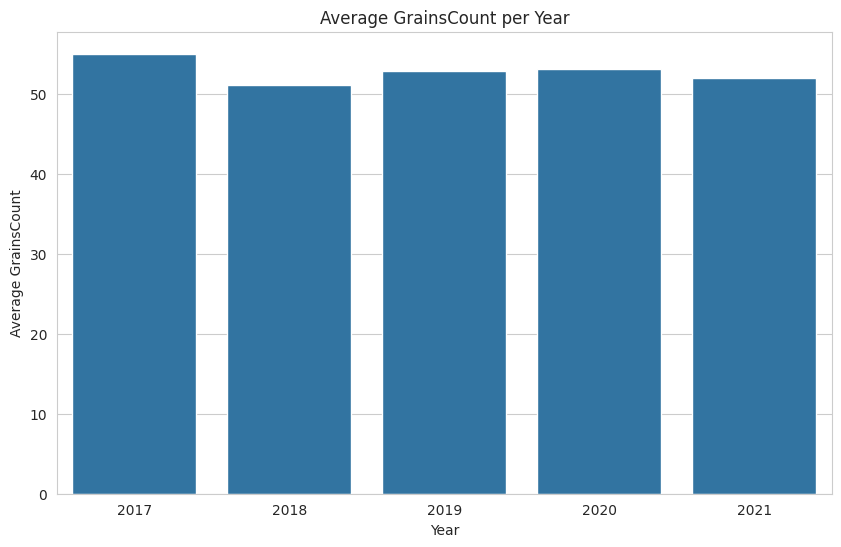

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the datetime columns for analysis
date_columns = ['HerbicideDate', 'HarvestDate', 'FirstIrrigationDay', 'SecondIrrigationDay']

# Convert all date columns to datetime if they aren't already
for col in date_columns:
    data[col] = pd.to_datetime(data[col])


# Aggregate GrainsCount by month and year
data['Month'] = data['HarvestDate'].dt.month
data['Year'] = data['HarvestDate'].dt.year

yearly_avg = data.groupby('Year')['GrainsCount'].mean()

# Plot average GrainsCount per year
plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_avg.index, y=yearly_avg.values)
plt.title('Average GrainsCount per Year')
plt.xlabel('Year')
plt.ylabel('Average GrainsCount')
plt.show()


Checking the dates in which the Harvest is being done

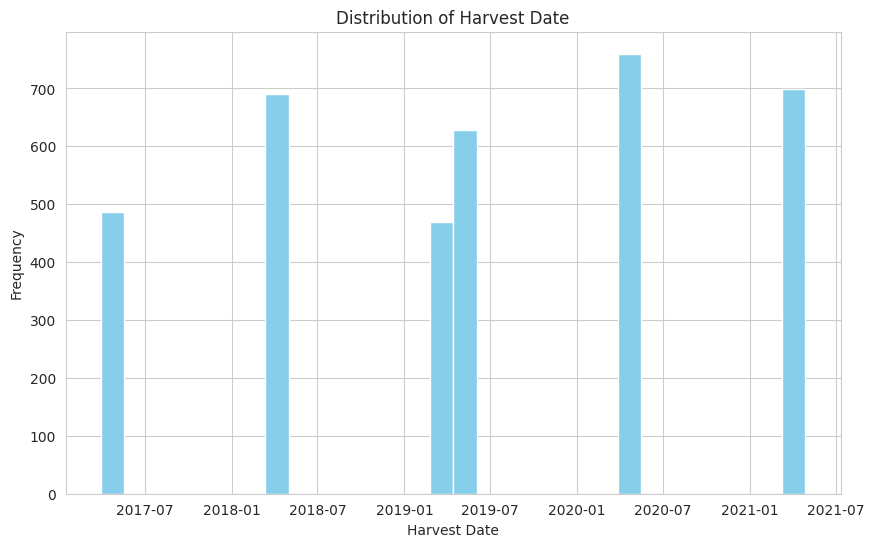

In [ ]:
# Plot histogram of HarvestDate
plt.figure(figsize=(10, 6))
data['HarvestDate'].hist(bins=30, color='skyblue')
plt.title('Distribution of Harvest Date')
plt.xlabel('Harvest Date')
plt.ylabel('Frequency')
plt.show()

**Distribution of GrainCoun**

Below it is showing the frequency of the Grain count and it is mostly below the mean which means most of the instance contain less grain than mean.

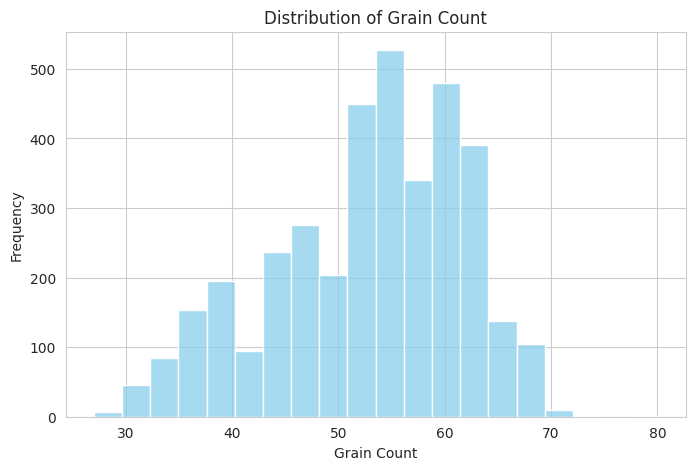

In [ ]:
# Distribution of GrainCount
plt.figure(figsize=(8, 5))
sns.histplot(data['GrainsCount'], bins=20, color='skyblue')
plt.title('Distribution of Grain Count')
plt.xlabel('Grain Count')
plt.ylabel('Frequency')
plt.show()

**Checking the Correlation**

Here we can see that there is a correlation between different variables that are attempted different times and then there mean is taken for example **BundleSpot1,BundleSpot2,BundleSpot3** etc

In [ ]:
data.columns

Index(['GrainsCount', 'Longitude', 'SowingDate', 'HerbicideDate',
       'HarvestDate', 'Year', 'Latitude', 'LandType', 'SoilType',
       'PreviousCrop', 'PrevCropResidue', 'CropEstablishment', 'Variety',
       'VarietyClass', 'SeedRate', 'BasalDAP', 'BasalNPK', 'BasalMOP',
       'BasalZn', 'Split1Urea', 'Split2Urea', 'Split3Urea', 'IrrigationNumber',
       'FirstIrrigationDay', 'SecondIrrigationDay', 'ThirdIrrigationDay',
       'HerbicideName', 'HerbicideDose', 'WeedingNumber', 'BundleSpot1',
       'BundleSpot2', 'BundleSpot3', 'BiomassYield', 'GrainSpot1',
       'GrainSpot2', 'GrainSpot3', 'GrainYield', 'TestWeightSpot1',
       'TestWeightSpot2', 'TestWeightSpot3', 'TestWeight', 'TillersSpot1',
       'TillersSpot2', 'TillersSpot3', 'TillersCount', 'GrainsEH1',
       'GrainsEH2', 'GrainsEH3', 'GrainsEH4', 'GrainsEH5', 'Month'],
      dtype='object')

In [ ]:
non_numeric_columns = data.select_dtypes(exclude=['float64', 'int64']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['SowingDate', 'HerbicideDate', 'HarvestDate', 'Year', 'LandType',
       'SoilType', 'PreviousCrop', 'CropEstablishment', 'Variety',
       'VarietyClass', 'FirstIrrigationDay', 'SecondIrrigationDay',
       'HerbicideName', 'HerbicideDose', 'Month'],
      dtype='object')


**Checking The Numerical Columns Correlation**

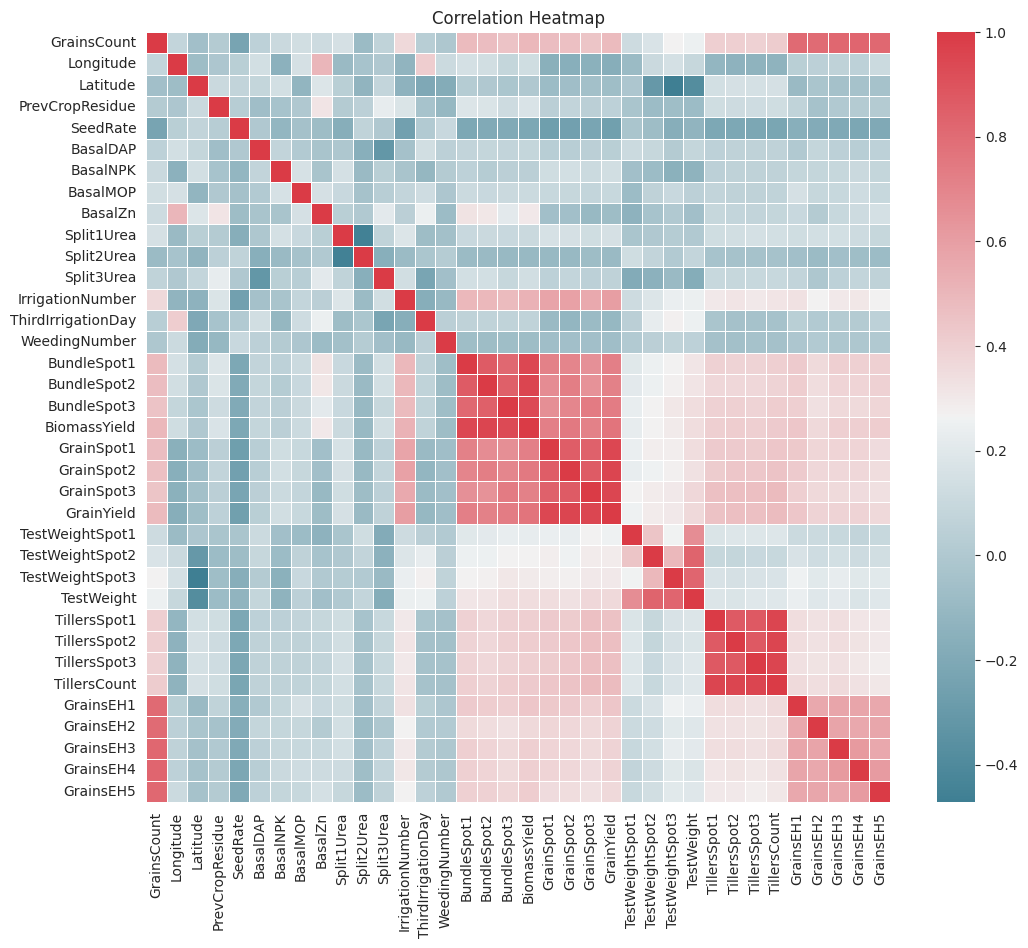

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data_numeric = data.drop(columns=non_numeric_columns)

# Compute correlation matrix
corr = data_numeric.corr()

# Define custom colormap with softer shades of blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap=cmap, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

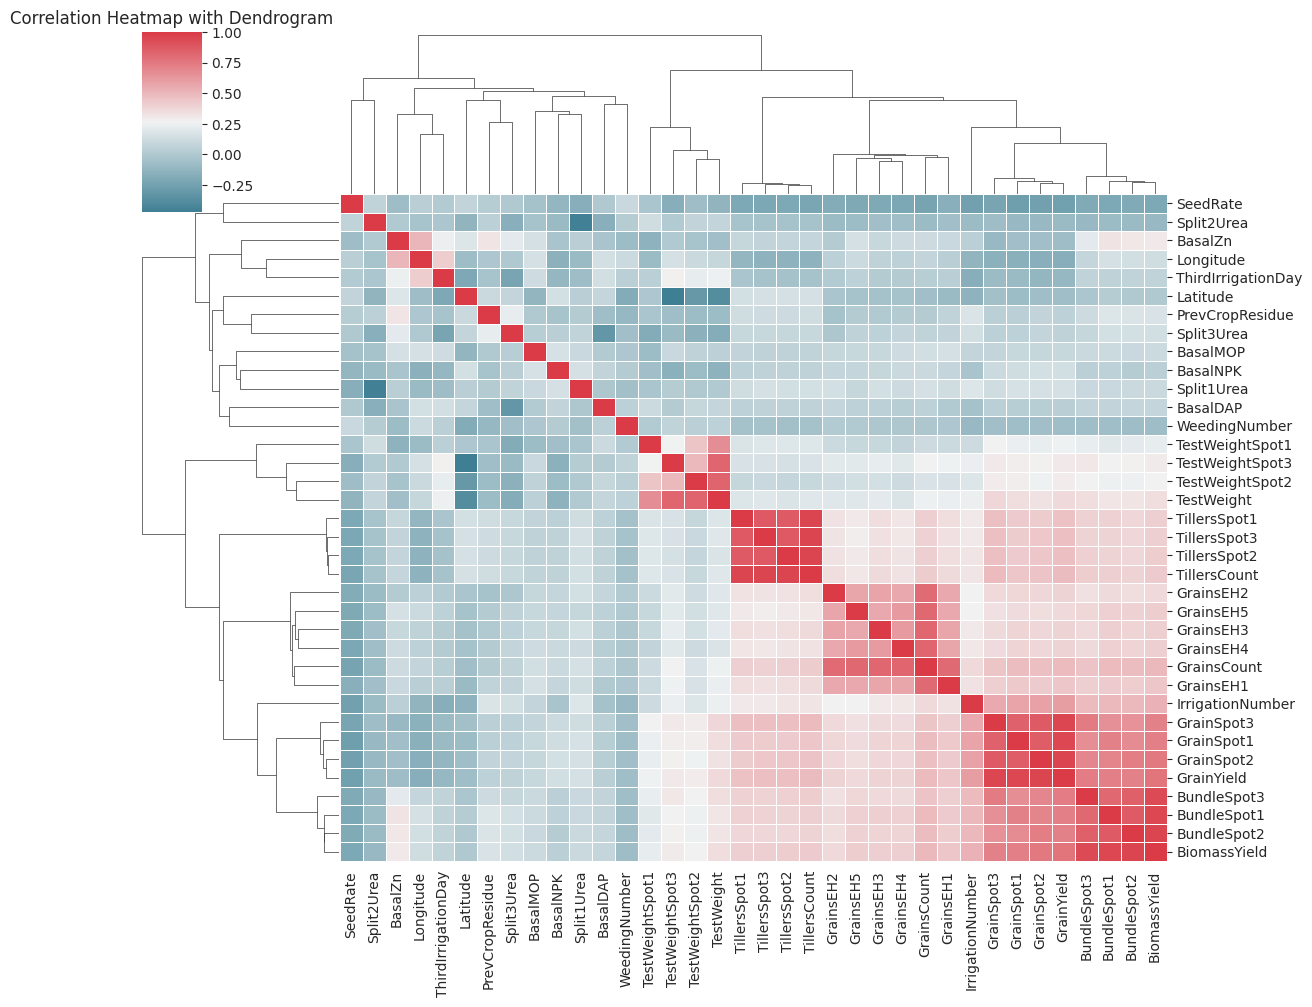

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data_numeric = data.drop(columns=non_numeric_columns)

# Compute correlation matrix
corr = data_numeric.corr()

# Define custom colormap with softer shades of blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Plot correlation heatmap with dendrogram using clustermap
sns.clustermap(corr, cmap=cmap, fmt=".2f", linewidths=0.5, figsize=(12, 10))

plt.title('Correlation Heatmap with Dendrogram')
plt.show()

**Correlation Analysis**

In [ ]:
correlation_matrix = data_numeric.corr()

# Extract correlations of 'GrainCount' with other variables
graincount_correlation = correlation_matrix['GrainsCount']

# Print correlation of 'GrainCount' with other variables
print("Correlation of GrainCount with other variables:")
print(graincount_correlation)



Correlation of GrainCount with other variables:
GrainsCount           1.000000
Longitude             0.076924
Latitude             -0.063070
PrevCropResidue       0.013411
SeedRate             -0.235400
BasalDAP              0.053048
BasalNPK              0.108533
BasalMOP              0.137206
BasalZn               0.116986
Split1Urea            0.151950
Split2Urea           -0.091249
Split3Urea            0.063418
IrrigationNumber      0.364026
ThirdIrrigationDay    0.031051
WeedingNumber        -0.006547
BundleSpot1           0.487471
BundleSpot2           0.471657
BundleSpot3           0.453332
BiomassYield          0.498027
GrainSpot1            0.472812
GrainSpot2            0.463913
GrainSpot3            0.447035
GrainYield            0.485109
TestWeightSpot1       0.119251
TestWeightSpot2       0.167295
TestWeightSpot3       0.265915
TestWeight            0.249745
TillersSpot1          0.402264
TillersSpot2          0.406149
TillersSpot3          0.391008
TillersCount          

**Checking Correleation for Categorical columns**

In [ ]:
import scipy.stats as stats

# Select categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Perform chi-square test for each pair of categorical variables
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            observed = pd.crosstab(data[col1], data[col2])
            chi2, p, _, _ = stats.chi2_contingency(observed)
            print(f"Chi-square test between '{col1}' and '{col2}': p-value = {p}")


Chi-square test between 'LandType' and 'SoilType': p-value = 2.4461871796551933e-204
Chi-square test between 'LandType' and 'PreviousCrop': p-value = 5.4131797930035876e-24
Chi-square test between 'LandType' and 'CropEstablishment': p-value = 0.21923645060948752
Chi-square test between 'LandType' and 'Variety': p-value = 4.409292655376928e-42
Chi-square test between 'LandType' and 'VarietyClass': p-value = 7.4912367902068e-10
Chi-square test between 'LandType' and 'HerbicideName': p-value = 7.81360579258615e-91
Chi-square test between 'LandType' and 'HerbicideDose': p-value = 2.481207974406159e-89
Chi-square test between 'SoilType' and 'LandType': p-value = 2.4461871796551933e-204
Chi-square test between 'SoilType' and 'PreviousCrop': p-value = 4.6467362954155995e-19
Chi-square test between 'SoilType' and 'CropEstablishment': p-value = 3.954204407190126e-33
Chi-square test between 'SoilType' and 'Variety': p-value = 7.301589623058858e-54
Chi-square test between 'SoilType' and 'VarietyC

**Clustering Correlation**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Preprocess the numeric data (handling missing values and standardization)
numeric_data = data[numeric_columns].fillna(data[numeric_columns].mean())  # Filling missing values with mean
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

# Determine the optimal number of clusters (optional)
# For example, using the elbow method
# You can replace this with other methods like silhouette score
# In this example, let's assume the optimal number of clusters is 3
# Feel free to adjust this based on your data and requirements
# Sum of squared distances for different values of k
# Determine the optimal number of clusters (optional)
# For example, using the elbow method
# You can replace this with other methods like silhouette score
# In this example, let's assume the optimal number of clusters is 3
# Feel free to adjust this based on your data and requirements
# Sum of squared distances for different values of k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(numeric_data_scaled)
    sse.append(kmeans.inertia_)

# Calculate the percentage improvement in SSD compared to next cluster
improvement_percentage = [(sse[i] - sse[i+1]) / sse[i] * 100 if i < len(sse) - 1 else None for i in range(len(sse))]

# Print the results
for i, improvement in enumerate(improvement_percentage):
    if improvement is not None:
        print(f"Cluster {i+1} is best fit {improvement:.2f}%")

Cluster 1 is best fit 20.54%
Cluster 2 is best fit 7.60%
Cluster 3 is best fit 5.51%
Cluster 4 is best fit 5.24%
Cluster 5 is best fit 3.66%
Cluster 6 is best fit 3.83%
Cluster 7 is best fit 3.08%
Cluster 8 is best fit 3.10%
Cluster 9 is best fit 2.96%


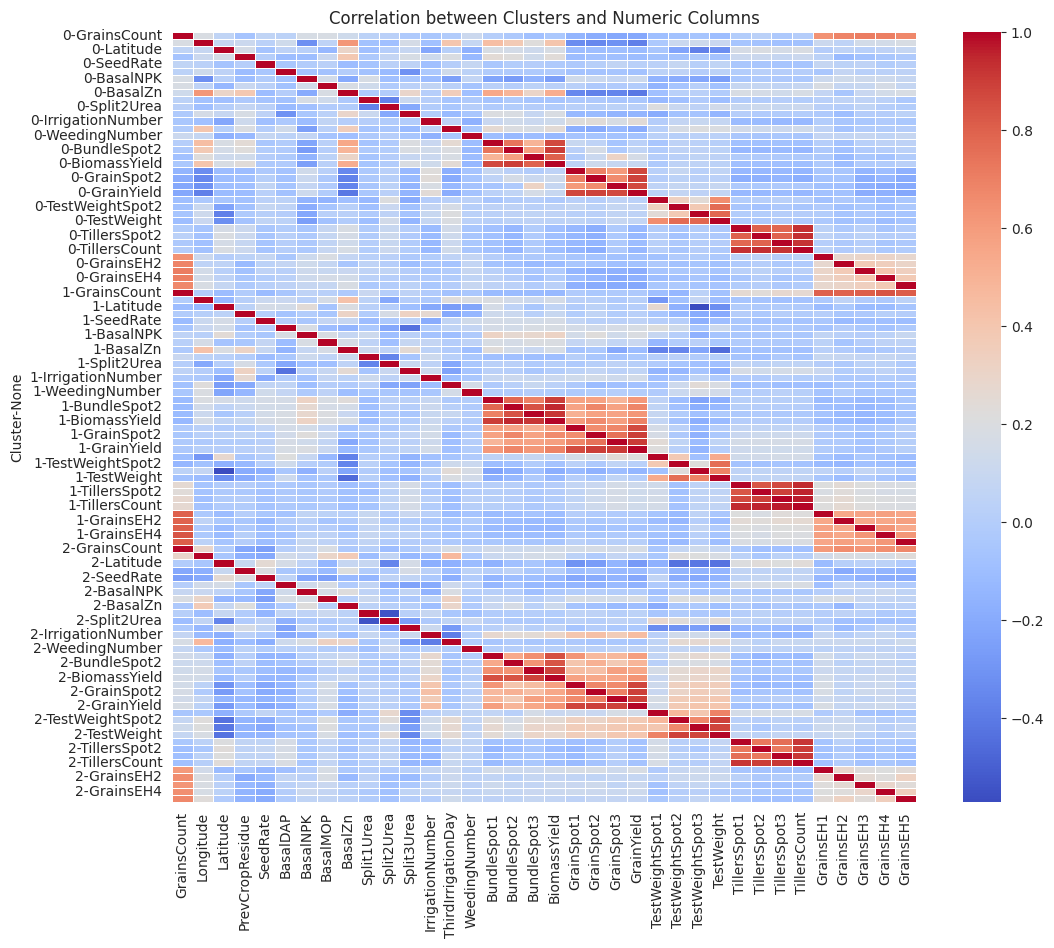

In [ ]:
# Perform clustering with the optimal number of clusters
n_clusters = 3  # Assume 3 clusters based on the elbow method
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(numeric_data_scaled)

# Add cluster labels to the original DataFrame
data['Cluster'] = cluster_labels

# Analyze cluster characteristics (e.g., mean of numeric columns for each cluster)
cluster_means = data.groupby('Cluster')[numeric_columns].mean()

# Compute correlation between cluster labels and numeric columns
cluster_correlation = data.groupby('Cluster')[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cluster_correlation, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation between Clusters and Numeric Columns')
plt.show()


**Different Classes Distribution**

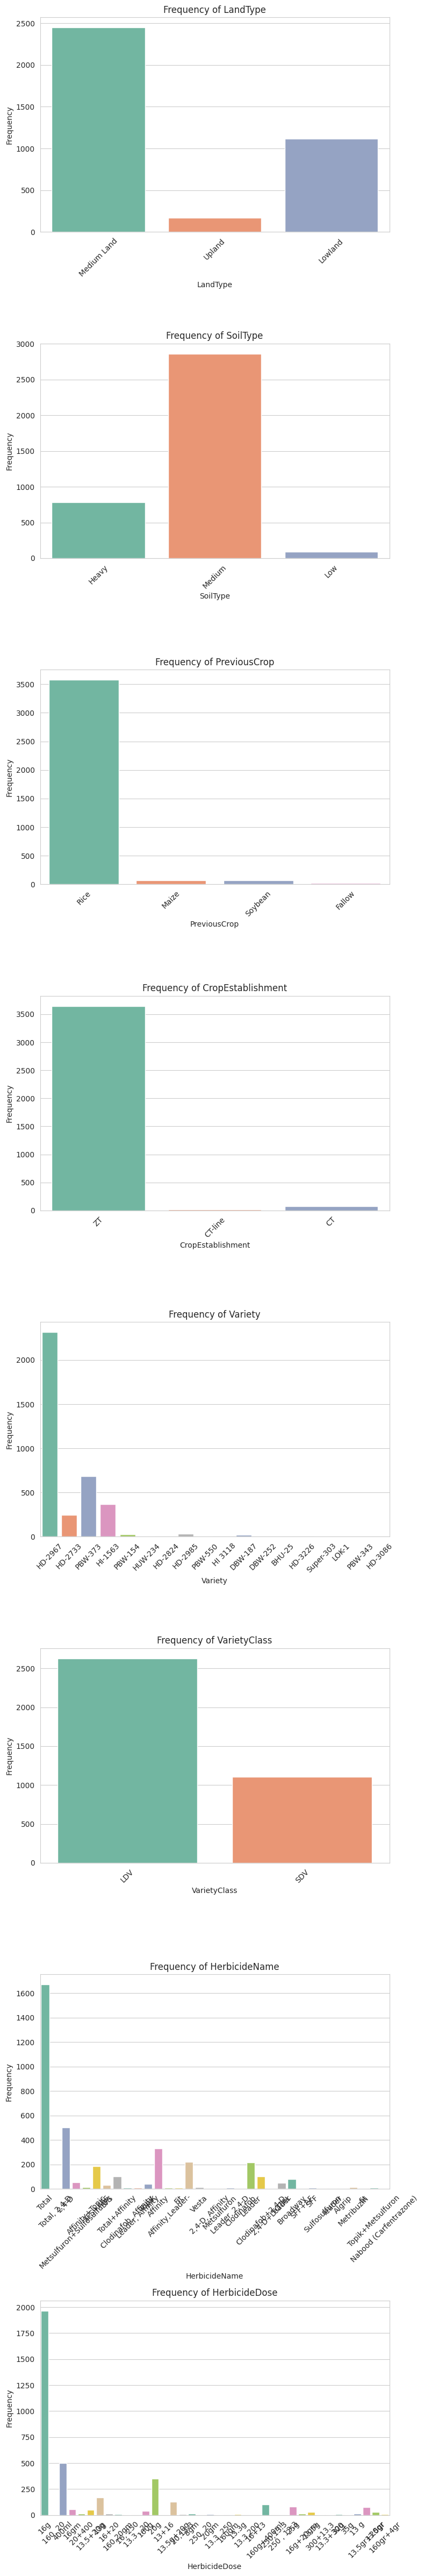

In [ ]:
# Get list of all categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Determine the number of rows and columns for subplots
num_rows = len(categorical_cols)
num_cols = 1

# Create subplots
plt.figure(figsize=(8*num_cols, 6*num_rows))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=data, x=col, palette='Set2')
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Distribution of Different Fertilizers applied on the crop(in kg per acre)**

Here we can see that mostly the ampount of DAP applied to the crops is much larger than the other fertelizers which is almost above 120kg per acre. On the second spot it is NPK that is almost above 70kg and then Zink.

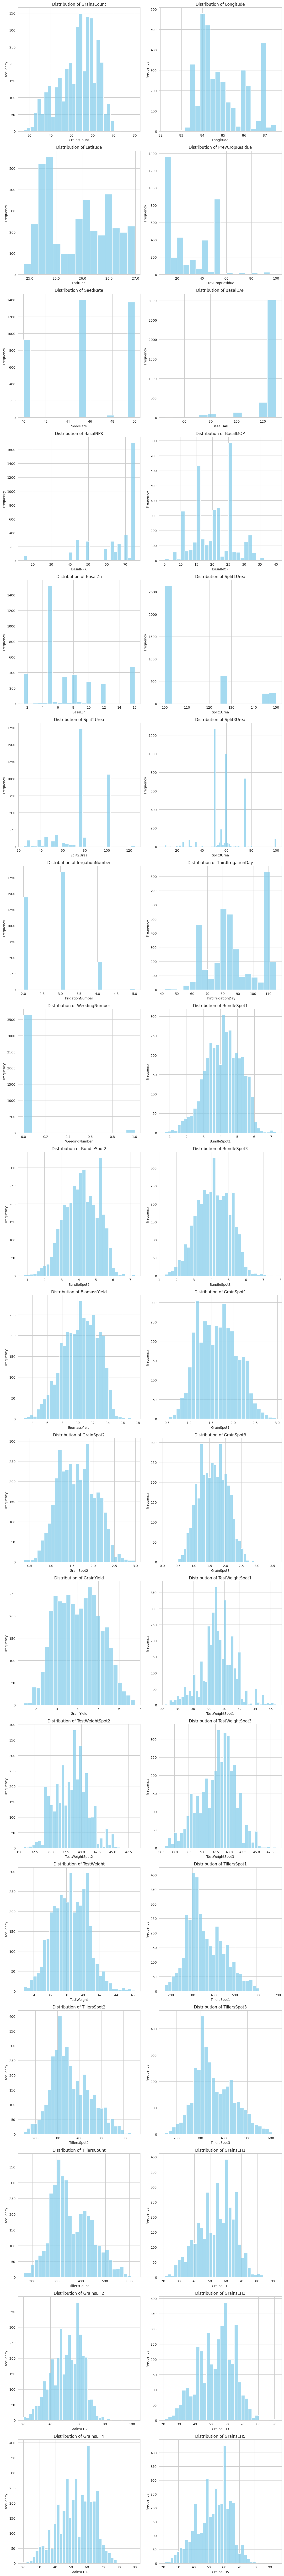

In [ ]:
# Get list of all numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of rows and columns for subplots
num_rows = (len(numeric_cols) + 1) // 2  # Add 1 to ensure all columns are covered
num_cols = 2

# Create subplots
plt.figure(figsize=(12, 6*num_rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(data[col], color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**Fertilizer vs GrainsCount**

We can see here there is realtionship between the fertelizer and the Grain  Count but they are not too much related

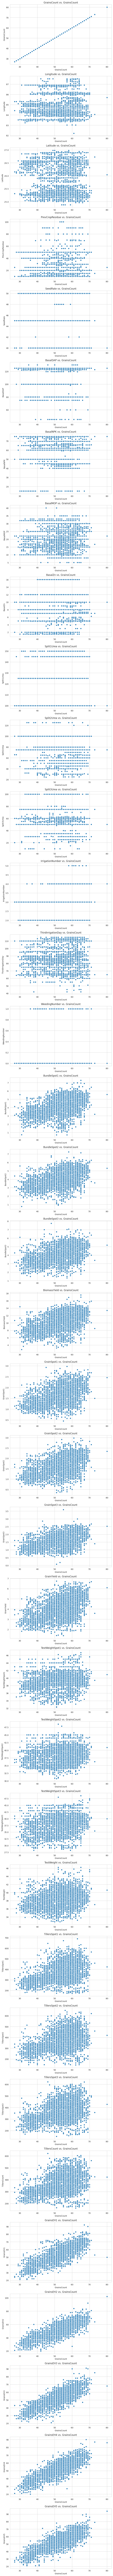

In [ ]:
# Get list of all numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Determine number of plots needed based on the number of numeric columns
num_plots = len(numeric_cols)

# Calculate number of rows and columns for subplots
num_rows = num_plots
num_cols = 1  # We'll have one column for each subplot

# Set up the figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 5 * num_rows))

# Iterate over each numeric column and create scatter plot
for i, col in enumerate(numeric_cols):
    sns.scatterplot(data=data, x='GrainsCount', y=col, ax=axes[i])  # Plot scatter plot
    axes[i].set_title(f'{col} vs. GrainsCount')  # Set title for each subplot
    axes[i].set_xlabel('GrainsCount')  # Set xlabel for each subplot
    axes[i].set_ylabel(col)  # Set ylabel for each subplot

plt.tight_layout()  # Adjust subplot layout
plt.show()  # Display the plots

**Checking the previous crops**

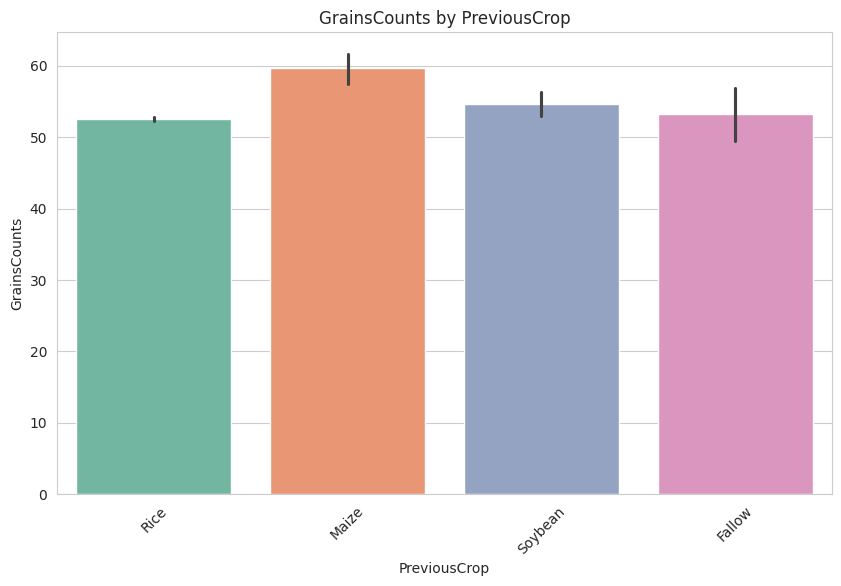

In [ ]:
# Create a bar plot using seaborn with a different color palette
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x='PreviousCrop', y='GrainsCount', data=data, palette='Set2')  # Change the palette to 'Set2'
plt.title('GrainsCounts by PreviousCrop')
plt.xlabel('PreviousCrop')
plt.ylabel('GrainsCounts')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**Soil Type**

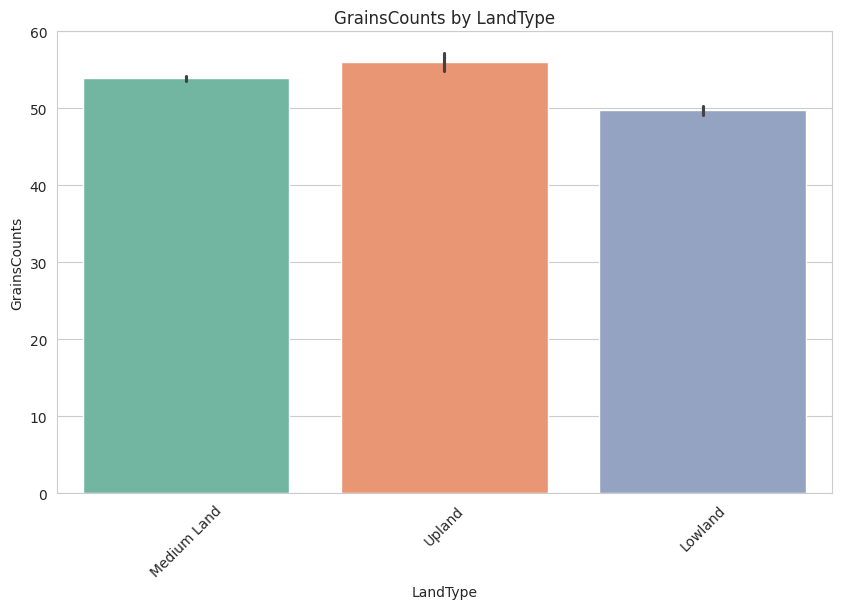

In [ ]:
# Create a bar plot using seaborn with a different color palette
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x='LandType', y='GrainsCount', data=data, palette='Set2')  # Change the palette to 'Set2'
plt.title('GrainsCounts by LandType')
plt.xlabel('LandType')
plt.ylabel('GrainsCounts')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**Cleaning and Preprocessing the data**

In [ ]:
data.columns

Index(['GrainsCount', 'Longitude', 'SowingDate', 'HerbicideDate',
       'HarvestDate', 'Year', 'Latitude', 'LandType', 'SoilType',
       'PreviousCrop', 'PrevCropResidue', 'CropEstablishment', 'Variety',
       'VarietyClass', 'SeedRate', 'BasalDAP', 'BasalNPK', 'BasalMOP',
       'BasalZn', 'Split1Urea', 'Split2Urea', 'Split3Urea', 'IrrigationNumber',
       'FirstIrrigationDay', 'SecondIrrigationDay', 'ThirdIrrigationDay',
       'HerbicideName', 'HerbicideDose', 'WeedingNumber', 'BundleSpot1',
       'BundleSpot2', 'BundleSpot3', 'BiomassYield', 'GrainSpot1',
       'GrainSpot2', 'GrainSpot3', 'GrainYield', 'TestWeightSpot1',
       'TestWeightSpot2', 'TestWeightSpot3', 'TestWeight', 'TillersSpot1',
       'TillersSpot2', 'TillersSpot3', 'TillersCount', 'GrainsEH1',
       'GrainsEH2', 'GrainsEH3', 'GrainsEH4', 'GrainsEH5', 'Month', 'Cluster'],
      dtype='object')

In [ ]:
data.head()

GrainsCount  Longitude SowingDate HerbicideDate HarvestDate  Year  \
0           71     83.866 2016-10-01    2016-11-28  2017-04-21  2017   
1           68     83.866 2016-10-01    2016-11-28  2017-04-24  2017   
2           59     84.590 2016-11-10    2016-12-12  2017-04-15  2017   
3           65     84.805 2016-11-10    2016-12-12  2017-04-18  2017   
4           60     84.603 2016-11-10    2016-12-12  2017-04-15  2017   

   Latitude     LandType SoilType PreviousCrop  ...  TillersSpot2  \
0    25.429  Medium Land    Heavy         Rice  ...         620.0   
1    25.428  Medium Land    Heavy         Rice  ...         525.0   
2    26.605       Upland   Medium         Rice  ...         557.0   
3    26.536  Medium Land   Medium         Rice  ...         530.0   
4    26.541       Upland   Medium         Rice  ...         415.0   

  TillersSpot3 TillersCount GrainsEH1  GrainsEH2  GrainsEH3  GrainsEH4  \
0        500.0          561        72         69         71         72   
1        525.0          550        65         65         70         71   
2        427.0          488        62         53         64         66   
3        405.0          473        69         62         67         61   
4        425.0          417        70         67         65         54   

   GrainsEH5  Month  Cluster  
0       71.0      4        2  
1       70.0      4        2  
2       50.0      4        2  
3       70.0      4        2  
4       45.0      4        2  

[5 rows x 52 columns]

In [ ]:
data.columns

Index(['GrainsCount', 'Longitude', 'SowingDate', 'HerbicideDate',
       'HarvestDate', 'Year', 'Latitude', 'LandType', 'SoilType',
       'PreviousCrop', 'PrevCropResidue', 'CropEstablishment', 'Variety',
       'VarietyClass', 'SeedRate', 'BasalDAP', 'BasalNPK', 'BasalMOP',
       'BasalZn', 'Split1Urea', 'Split2Urea', 'Split3Urea', 'IrrigationNumber',
       'FirstIrrigationDay', 'SecondIrrigationDay', 'ThirdIrrigationDay',
       'HerbicideName', 'HerbicideDose', 'WeedingNumber', 'BundleSpot1',
       'BundleSpot2', 'BundleSpot3', 'BiomassYield', 'GrainSpot1',
       'GrainSpot2', 'GrainSpot3', 'GrainYield', 'TestWeightSpot1',
       'TestWeightSpot2', 'TestWeightSpot3', 'TestWeight', 'TillersSpot1',
       'TillersSpot2', 'TillersSpot3', 'TillersCount', 'GrainsEH1',
       'GrainsEH2', 'GrainsEH3', 'GrainsEH4', 'GrainsEH5', 'Month', 'Cluster'],
      dtype='object')

In [ ]:
# Function to extract numeric part and convert to float
def extract_numeric(herbicide_dose):
    numeric_parts = herbicide_dose.split('+')  # Split by '+'
    for part in numeric_parts:
        numeric_part = ''.join(filter(str.isdigit, part))  # Extract numeric part
        if numeric_part:
            return float(numeric_part)  # Convert to float if numeric part exists
    return None  # Return None if no numeric part found

# Apply the function to the HerbicideDose column
data['HerbicideDose'] = data['HerbicideDose'].apply(extract_numeric)

In [ ]:
data.columns

Index(['GrainsCount', 'Longitude', 'SowingDate', 'HerbicideDate',
       'HarvestDate', 'Year', 'Latitude', 'LandType', 'SoilType',
       'PreviousCrop', 'PrevCropResidue', 'CropEstablishment', 'Variety',
       'VarietyClass', 'SeedRate', 'BasalDAP', 'BasalNPK', 'BasalMOP',
       'BasalZn', 'Split1Urea', 'Split2Urea', 'Split3Urea', 'IrrigationNumber',
       'FirstIrrigationDay', 'SecondIrrigationDay', 'ThirdIrrigationDay',
       'HerbicideName', 'HerbicideDose', 'WeedingNumber', 'BundleSpot1',
       'BundleSpot2', 'BundleSpot3', 'BiomassYield', 'GrainSpot1',
       'GrainSpot2', 'GrainSpot3', 'GrainYield', 'TestWeightSpot1',
       'TestWeightSpot2', 'TestWeightSpot3', 'TestWeight', 'TillersSpot1',
       'TillersSpot2', 'TillersSpot3', 'TillersCount', 'GrainsEH1',
       'GrainsEH2', 'GrainsEH3', 'GrainsEH4', 'GrainsEH5', 'Month', 'Cluster'],
      dtype='object')

In [ ]:
# Function to process HerbicideName column and return categories
def process_herbicide_name(herbicide_name):
    categories = herbicide_name.split('+')  # Split by '+'
    return categories[0]  # Return the first part


# Apply the function to the HerbicideName column
data['HerbicideName'] = data['HerbicideName'].apply(process_herbicide_name)


**Checking and Removing The Outliers**

In [ ]:
import pandas as pd

# Assuming data is your original DataFrame

# Select only numerical columns for outlier detection
numerical_columns = data.select_dtypes(include=['float64','int64']).columns

# Create a copy of the original DataFrame
data_cleaned = data.copy()

# Calculate Z-scores for each numerical column
z_scores = (data_cleaned[numerical_columns] - data_cleaned[numerical_columns].mean()) / data_cleaned[numerical_columns].std()

# Define a threshold to determine outliers
threshold = 3

# Identify outliers using Z-scores
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Remove rows containing outliers
data_cleaned = data_cleaned[~outliers.any(axis=1)]

# Calculate the number of removed rows
removed_rows = len(data) - len(data_cleaned)

print(f"Number of rows removed due to outlier removal: {removed_rows}")

# Display the remaining number of rows
print(f"Number of remaining rows after outlier removal: {len(data_cleaned)}")


Number of rows removed due to outlier removal: 453
Number of remaining rows after outlier removal: 3282


In [ ]:
len(data_cleaned)

3282

**Scaling the Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler for scaling numeric and float columns
scaler = StandardScaler()

# Columns to scale
numeric_columns = ['WeedingNumber', 'BasalDAP', 'Latitude', 'GrainSpot3', 'BasalZn',
                   'Split3Urea', 'BasalNPK', 'BundleSpot1', 'TestWeight', 'BiomassYield', 'GrainSpot1',
                   'BundleSpot3', 'BundleSpot2', 'TillersCount', 'TillersSpot1', 'GrainSpot2',
                   'GrainYield', 'TillersSpot2', 'TestWeightSpot3', 'TillersSpot3', 'Split2Urea',
                   'TestWeightSpot2']

# Scale numeric and float columns
data_cleaned[numeric_columns] = scaler.fit_transform(data_cleaned[numeric_columns])


**Encoding the Categorical Data**

In [ ]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Columns to encode
categorical_columns = ['CropEstablishment', 'Variety', 'VarietyClass', 'HerbicideName',
                       'LandType', 'SoilType', 'PreviousCrop']

# Initialize dictionary to store label encoders
label_encoders = {}

# Encode categorical columns
for col in categorical_columns:
    label_encoder = LabelEncoder()
    data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col])
    # Store label encoder
    label_encoders[col] = label_encoder

# If you want to save all label encoders in a single file
joblib.dump(label_encoders, 'all_label_encoders.joblib')


['all_label_encoders.joblib']

**Checking Correlation for Categorical Columns after Encoding them**

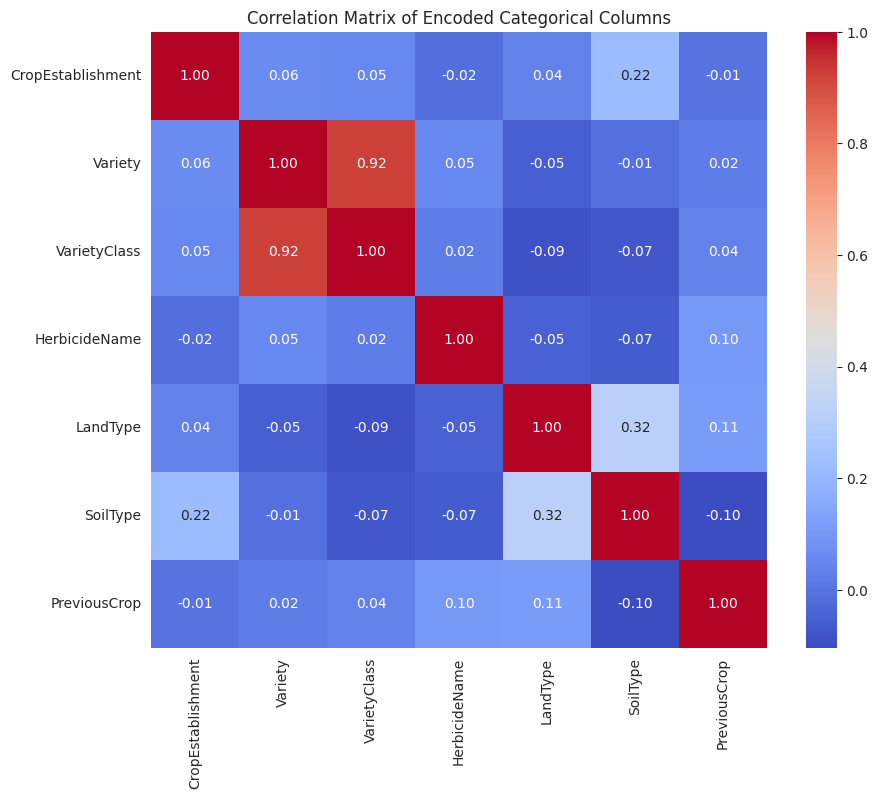

In [ ]:
# Define the encoded categorical columns
encoded_categorical_columns = ['CropEstablishment', 'Variety', 'VarietyClass', 'HerbicideName',
                               'LandType', 'SoilType', 'PreviousCrop']


# Calculate the correlation matrix
correlation_matrix = data_cleaned[encoded_categorical_columns].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Encoded Categorical Columns')
plt.show()

In [ ]:
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')
# Verify the saved files
print("Scaled data, Scaler, and LabelEncoder saved successfully!")

Scaled data, Scaler, and LabelEncoder saved successfully!


In [ ]:
data_cleaned.drop(columns=['FirstIrrigationDay','SecondIrrigationDay','ThirdIrrigationDay','HarvestDate','HerbicideDate','Year','SowingDate',	'Cluster'], inplace=True)

**Spliting the Data to Training and Testing of the Model**

In [ ]:
data_cleaned.columns

Index(['GrainsCount', 'Longitude', 'Latitude', 'LandType', 'SoilType',
       'PreviousCrop', 'PrevCropResidue', 'CropEstablishment', 'Variety',
       'VarietyClass', 'SeedRate', 'BasalDAP', 'BasalNPK', 'BasalMOP',
       'BasalZn', 'Split1Urea', 'Split2Urea', 'Split3Urea', 'IrrigationNumber',
       'HerbicideName', 'HerbicideDose', 'WeedingNumber', 'BundleSpot1',
       'BundleSpot2', 'BundleSpot3', 'BiomassYield', 'GrainSpot1',
       'GrainSpot2', 'GrainSpot3', 'GrainYield', 'TestWeightSpot1',
       'TestWeightSpot2', 'TestWeightSpot3', 'TestWeight', 'TillersSpot1',
       'TillersSpot2', 'TillersSpot3', 'TillersCount', 'GrainsEH1',
       'GrainsEH2', 'GrainsEH3', 'GrainsEH4', 'GrainsEH5', 'Month'],
      dtype='object')

In [ ]:
columns_to_remove = [
    'BundleSpot1', 'BundleSpot2', 'BundleSpot3',
    'BiomassYield',
    'GrainSpot1', 'GrainSpot2', 'GrainSpot3', 'GrainYield',
    'TestWeightSpot1', 'TestWeightSpot2', 'TestWeightSpot3', 'TestWeight',
    'TillersSpot1', 'TillersSpot2', 'TillersSpot3', 'TillersCount',
    'GrainsEH2', 'GrainsEH3', 'GrainsEH4', 'GrainsEH5','Split2Urea','Split3Urea'

]

# Drop the specified columns
data_cleaned_modified = data_cleaned.drop(columns=columns_to_remove)


In [ ]:
data_cleaned_modified.columns

Index(['GrainsCount', 'Longitude', 'Latitude', 'LandType', 'SoilType',
       'PreviousCrop', 'PrevCropResidue', 'CropEstablishment', 'Variety',
       'VarietyClass', 'SeedRate', 'BasalDAP', 'BasalNPK', 'BasalMOP',
       'BasalZn', 'Split1Urea', 'IrrigationNumber', 'HerbicideName',
       'HerbicideDose', 'WeedingNumber', 'GrainsEH1', 'Month'],
      dtype='object')

In [ ]:
# Extracting features (X) and the target variable (y)
X = data_cleaned_modified.drop(columns=['GrainsCount'])  # Features (independent variables)
y = data_cleaned_modified['GrainsCount']  # Target variable (dependent variable)


In [ ]:

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shape of the training and testing sets
print("Training data shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing data shape (X_test, y_test):", X_test.shape, y_test.shape)

Training data shape (X_train, y_train): (2625, 21) (2625,)
Testing data shape (X_test, y_test): (657, 21) (657,)


## Checking The Column Ranking Using RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# You can change the value of n_features_to_select to increase the features
rfe_selector = RFE(estimator=LinearRegression(), n_features_to_select=20)
X_train_rfe = rfe_selector.fit_transform(X_train, y_train)
X_test_rfe = rfe_selector.transform(X_test)  # Apply the same transformation to test data


In [ ]:
# Get the indices of the selected features
selected_indices = rfe_selector.support_

# Get the names of the selected features
selected_features = X_train.columns[selected_indices]

print("Selected Features:")
for feature in selected_features:
    print(feature)

Selected Features:
Longitude
Latitude
LandType
SoilType
PreviousCrop
PrevCropResidue
CropEstablishment
Variety
VarietyClass
SeedRate
BasalDAP
BasalNPK
BasalMOP
BasalZn
Split1Urea
IrrigationNumber
HerbicideName
HerbicideDose
GrainsEH1
Month


In [ ]:
X.select_dtypes(include=['object']).columns

Index([], dtype='object')

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Initialize the Linear Regression model
linear_regressor = LinearRegression()

# Train the model
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on the test set
y_pred_linear = linear_regressor.predict(X_test)

In [ ]:
# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Model Evaluation:")
print("Mean Squared Error:", mse_linear)
print("Mean Absolute Error:", mae_linear)
print("Root Mean Squared Error:", rmse_linear)
print("R-squared:", r2_linear)

Linear Regression Model Evaluation:
Mean Squared Error: 22.30869228350185
Mean Absolute Error: 3.6865079550396196
Root Mean Squared Error: 4.7232078382707074
R-squared: 0.7242469532657906


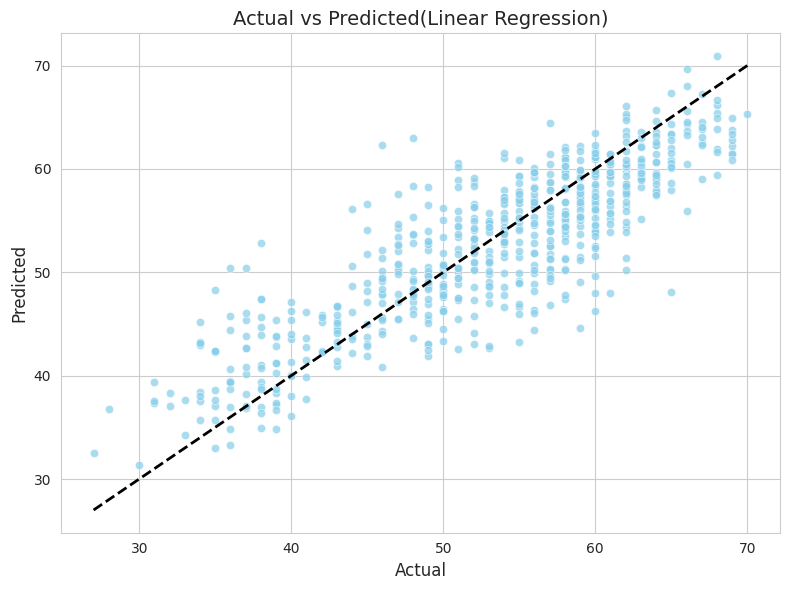

In [ ]:
# Set style
sns.set_style("whitegrid")

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_linear, color='skyblue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title('Actual vs Predicted(Linear Regression)', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

**Cross Validation with 10 Folds**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize KFold with 10 splits
kf = KFold(n_splits=10)

# Lists to store results
mse_scores = []

# Iterate over the splits
for train_index, test_index in kf.split(X):
    # Split data into train and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize Linear Regression model
    model = LinearRegression()

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Print mean squared error for each model run
print("Mean Squared Error for Each Model Run:")
for i, mse in enumerate(mse_scores):
    print(f"Model {i+1}: {mse}")

# Calculate and print the average mean squared error
avg_mse = np.mean(mse_scores)
print("\nAverage Mean Squared Error:", avg_mse)


Mean Squared Error for Each Model Run:
Model 1: 26.475374690533084
Model 2: 16.42230419629829
Model 3: 21.520584456450944
Model 4: 24.842616100442786
Model 5: 31.352665578083005
Model 6: 31.572631637066994
Model 7: 22.425495487428424
Model 8: 31.91250845209084
Model 9: 25.29078829703037
Model 10: 25.322031692934782

Average Mean Squared Error: 25.71370005883595


**Logarthim Regression**

In [ ]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant term to the predictor variable
X_train_with_const = sm.add_constant(X_train)

In [ ]:
# Fit the model
model = sm.OLS(y_train, X_train_with_const)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            GrainsCount   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     277.0
Date:                Sun, 21 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:19:19   Log-Likelihood:                -7943.7
No. Observations:                2625   AIC:                         1.593e+04
Df Residuals:                    2604   BIC:                         1.605e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -22.0686     11.13

In [ ]:
# Add a constant term to the testing features
X_test_with_const = sm.add_constant(X_test)

# Generate predictions on the testing set
y_pred = results.predict(X_test_with_const)

# Calculate the residuals (errors)
residuals = y_test - y_pred

# Calculate metrics to evaluate the model's performance
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)


Mean Squared Error (MSE): 22.308692283502708
R-squared: 0.72424695326578


**Polinomiyal Regression (like X^2 for all features)**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Assuming X and y are your predictor variables and target variable, respectively

# Specify the degree of the polynomial features
degree = 2  # You can adjust this as needed

# Create a polynomial regression model pipeline
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
model.fit(X, y)



Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [ ]:
# Predict on the test set
y_pred_polinomial = model.predict(X_test)

In [ ]:
# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_polinomial)
mae_linear = mean_absolute_error(y_test, y_pred_polinomial)
rmse_linear = mean_squared_error(y_test, y_pred_polinomial, squared=False)
r2_linear = r2_score(y_test, y_pred_polinomial)

print("Linear Regression Model Evaluation:")
print("Mean Squared Error:", mse_linear)
print("Mean Absolute Error:", mae_linear)
print("Root Mean Squared Error:", rmse_linear)
print("R-squared:", r2_linear)

Linear Regression Model Evaluation:
Mean Squared Error: 16.012115887668717
Mean Absolute Error: 3.1096371997929784
Root Mean Squared Error: 4.001514199358628
R-squared: 0.8020776079308225


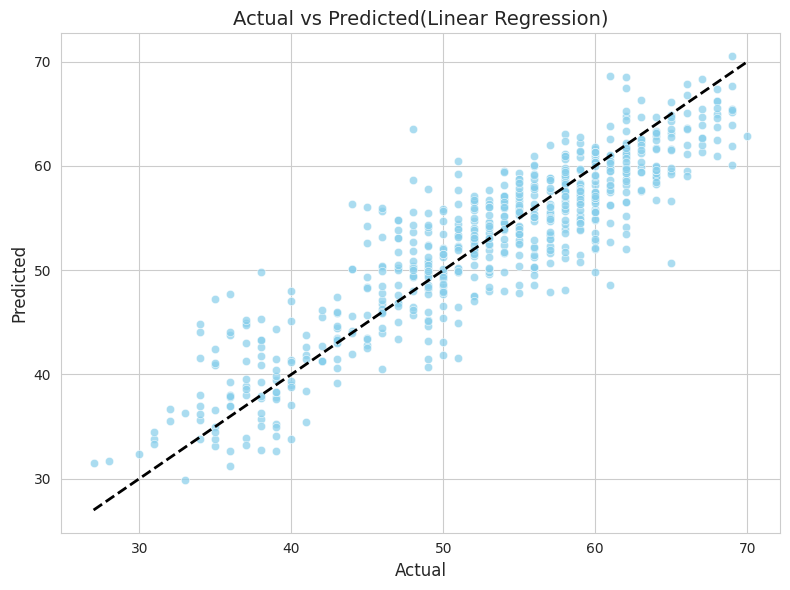

In [ ]:
# Set style
sns.set_style("whitegrid")

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_polinomial, color='skyblue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title('Actual vs Predicted(Linear Regression)', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

**Nueral Network**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming X and y are your predictor variables and target variable, respectively

# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with 1 neuron for regression
])



In [ ]:
# Split the data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (2625, 21)
X_test shape: (657, 21)
y_train shape: (2625,)
y_test shape: (657,)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
66/66 [==============================] - 1s 4ms/step - loss: 2537.6506 - val_loss: 56.2518
Epoch 2/50
66/66 [==============================] - 0s 2ms/step - loss: 121.0303 - val_loss: 52.2419
Epoch 3/50
66/66 [==============================] - 0s 2ms/step - loss: 408.4222 - val_loss: 406.4605
Epoch 4/50
66/66 [==============================] - 0s 2ms/step - loss: 1856.7407 - val_loss: 797.6262
Epoch 5/50
66/66 [==============================] - 0s 3ms/step - loss: 1082.6750 - val_loss: 251.7168
Epoch 6/50
66/66 [==============================] - 0s 3ms/step - loss: 1027.1693 - val_loss: 604.8530
Epoch 7/50
66/66 [==============================] - 0s 4ms/step - loss: 160.0196 - val_loss: 48.3111
Epoch 8/50
66/66 [==============================] - 0s 4ms/step - loss: 411.5667 - val_loss: 513.6498
Epoch 9/50
66/66 [==============================] - 0s 4ms/step - loss: 347.9397 - val_loss: 308.8362
Epoch 10/50
66/66 [==============================] - 0s 4ms/step - loss: 2691.895

In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Mean Squared Error on Training Data:", loss)

21/21 [==============================] - 0s 1ms/step - loss: 118.5670
Mean Squared Error on Training Data: 118.56700897216797


**Stepwise Regression with Feature Selection**

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
linearreg = LinearRegression()
forwad = SequentialFeatureSelector(
linearreg,
k_features=10,
forward=True,
verbose=1,
scoring="neg_mean_squared_error"
)
sf = forwad.fit(X,y)

Features: 10/10

In [ ]:
feat_names = list(sf.k_feature_names_)
print(feat_names)

print(sf.k_feature_idx_)


['Longitude', 'LandType', 'PreviousCrop', 'PrevCropResidue', 'CropEstablishment', 'VarietyClass', 'SeedRate', 'BasalNPK', 'IrrigationNumber', 'GrainsEH1']
(0, 2, 4, 5, 6, 8, 9, 11, 15, 19)


In [ ]:
import statsmodels.api as sm

X = np.append(arr=np.ones((len(data_cleaned),1)).astype(int),values = X, axis=1)
print(X)
X_opt = X[:,[0, 2, 5, 6, 8, 9, 11, 16, 17, 21]]
regressor_OLS = sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

[[ 1.         84.59        1.1447476  ...  0.         62.
   4.        ]
 [ 1.         84.805       1.0282139  ...  0.         69.
   4.        ]
 [ 1.         84.603       1.03665837 ...  0.         70.
   4.        ]
 ...
 [ 1.         84.818       0.87114673 ...  0.         31.
   4.        ]
 [ 1.         84.887       1.07043626 ...  0.         47.
   4.        ]
 [ 1.         84.828       0.86776895 ...  0.         29.
   4.        ]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            GrainsCount   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     125.1
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          1.07e-202
Time:                        16:19:33   Log-Likelihood:                -11331.
No. Observations:                3282   AIC:                         2.268e+04
Df Residuals:                    3272   BIC:                         2.274e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.9689      5.360      8.390      0.000      34.460      55.478
x1            -0.4067      0.142     -2.855      0.004      -0.686      -0.127
x2            -1.1868      0.584     -2.032      0.042      -2.332      -0.041
x3            -0.0183      0.008     -2.313      0.021      -0.034      -0.003
x4             0.6208      0.128      4.838      0.000       0.369       0.872
x5           -10.5042      0.799    -13.144      0.000     -12.071      -8.937
x6             0.2327      0.137      1.695      0.090      -0.036       0.502
x7             3.5809      0.226     15.820      0.000       3.137       4.025
x8            -0.0510      0.016     -3.118      0.002      -0.083      -0.019
x9             0.4607      1.352      0.341      0.733      -2.190       3.111
==============================================================================
Omnibus:                       61.571   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.790
Skew:                          -0.344   Prob(JB):                     8.53e-15
Kurtosis:                       2.990   Cond. No.                     1.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""